# Analyze model in regards of prediction performance and interpretability

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from config import ELECTRIC_MODEL_FILE, TRAIN_TEST_SPLIT_ELECTRIC_FILE
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [2]:
# load train_test_split objects
X_train, X_test, y_train, y_test = joblib.load(TRAIN_TEST_SPLIT_ELECTRIC_FILE)

In [3]:
X_train.head()

,member_state_AT,member_state_BE,member_state_BG,member_state_CY,member_state_CZ,member_state_DE,member_state_DK,member_state_EE,member_state_ES,member_state_FI,...,commercial_name_iX3,commercial_name_other,category_of_vehicle_M1,category_of_vehicle_M1,category_of_vehicle_M1G,category_of_vehicle_N1,mass_vehicle,engine_power,year,electric_range
2349347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.435929,0.916329,1.023808,0.436143
1270572,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.775093,0.065619,-0.229645,0.146002
141100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.061816,-0.043758,-1.483097,-1.679079
146127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.713010,-1.259058,-1.483097,-2.736690
2248446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.009940,0.770493,1.023808,0.773081


In [4]:
model = joblib.load(ELECTRIC_MODEL_FILE)

In [5]:
# Predict on test set
y_pred = model.predict(X_test)

In [20]:
np.mean(y_test)

np.float64(168.09903453016753)

In [21]:
np.mean(y_pred)

np.float64(168.0990889094704)

In [18]:
y_pred[:5]

array([246.00884956, 180.        , 155.        , 168.95993871,
       177.        ])

In [19]:
y_test[:5]

1227154    246.0
3796927    180.0
2950581    155.0
3649555    169.0
855082     177.0
Name: electric_energy_consumption, dtype: float64

In [6]:
# calculate metrics

# R-Squared
r2 = r2_score(y_test, y_pred)
print("R-Squared: ",r2)

# Adjusted R-Squared
n = len(y_test)  # Number of samples
p = X_test.shape[1]  # Number of features
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-Squared: ",adjusted_r2)

# MSE
mean_squared_error_reg = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("MSE: ",mean_squared_error_reg)

# RMSE
root_mean_squared_error_reg = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
print("RMSE: ",root_mean_squared_error_reg)


R-Squared:  0.9706514944335698
Adjusted R-Squared:  0.9706438238558385
MSE:  17.6157250532277
RMSE:  4.197109130488234


## Compare predicted vs actual values

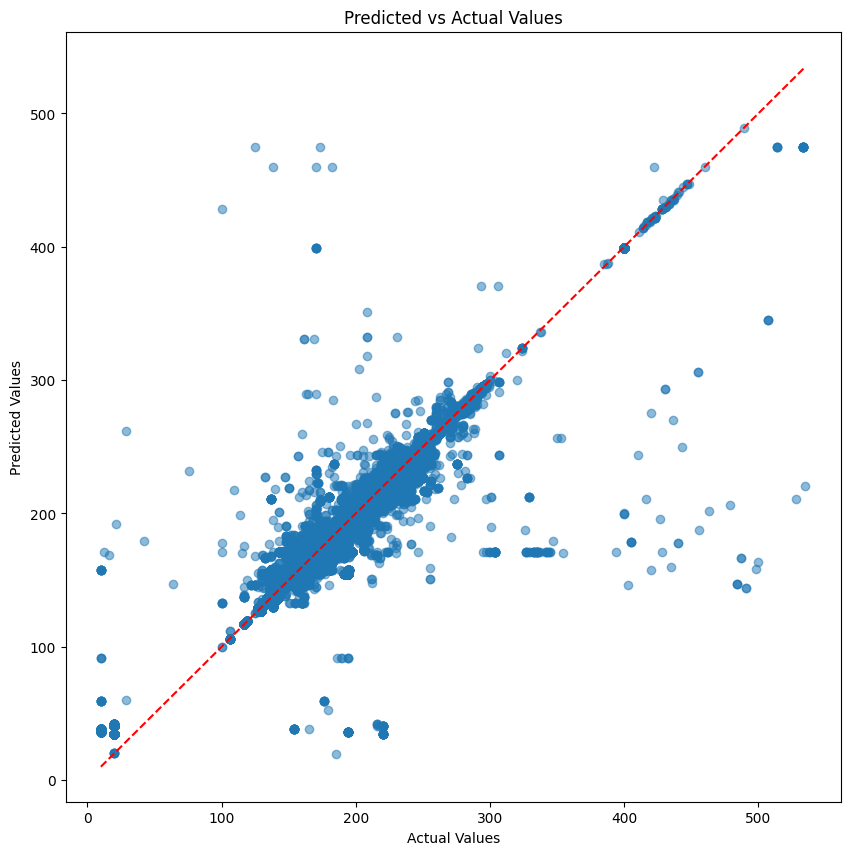

In [7]:
# Plot predicted vs. actual values
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

## Residual Plot

In [8]:
residuals = y_test - y_pred

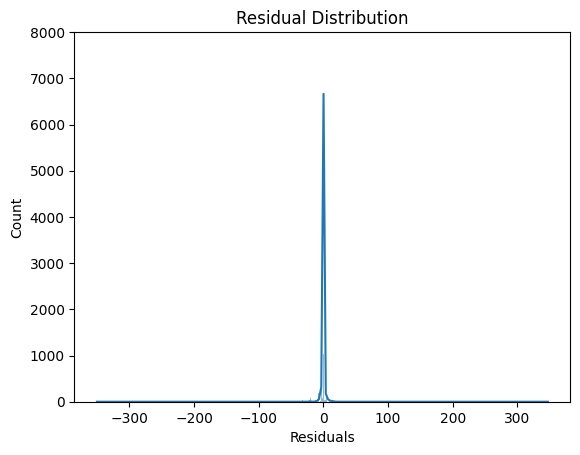

In [9]:
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.ylim([0, 8000])
plt.show()

## Analyse feature importance

In [10]:
feature_names = X_train.columns
feature_importance = model.feature_importances_

# only take selection of top features
N_TOP_FEATURES = 40

In [11]:
top_sorted_idx = np.argsort(feature_importance)[-N_TOP_FEATURES:]

top_feature_names = np.array(feature_names)[top_sorted_idx]
top_feature_importances = feature_importance[top_sorted_idx]

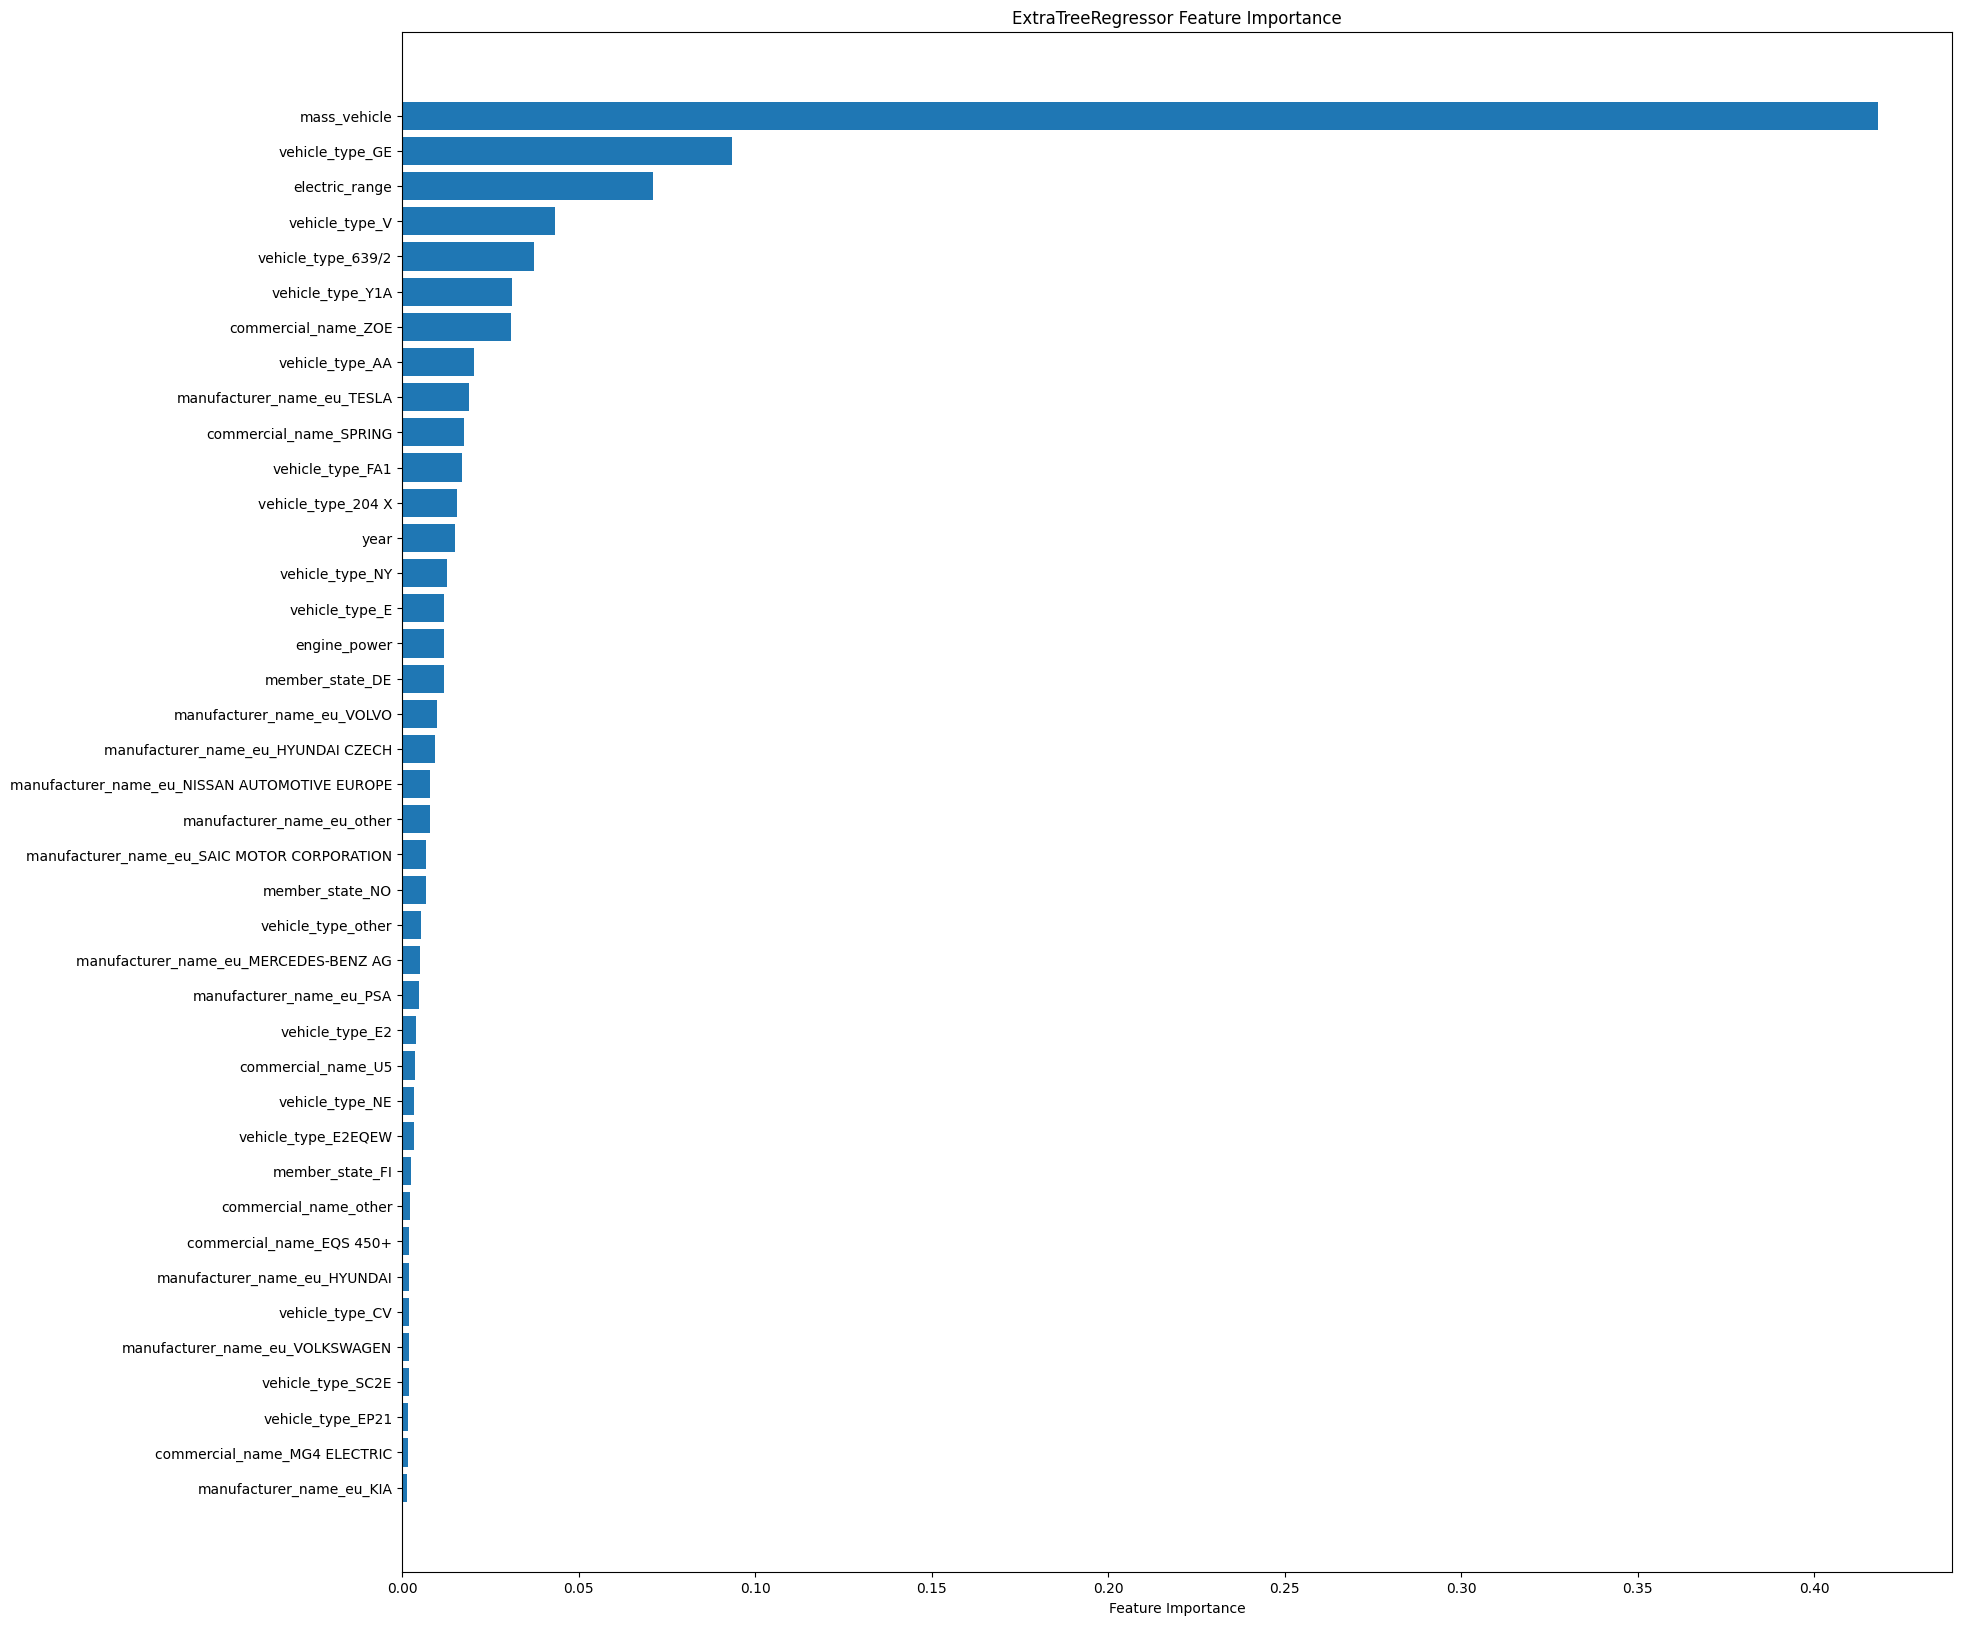

In [12]:
plt.figure(figsize=(20, 20))
plt.barh(range(len(top_sorted_idx)), top_feature_importances)
plt.yticks(range(len(top_sorted_idx)), top_feature_names)
plt.xlabel("Feature Importance")
plt.title("ExtraTreeRegressor Feature Importance")
plt.show()

## Partial Dependence Plots (PDP)

Shows how changing a specific feature affects the model's predictions.

In [13]:
# from sklearn.inspection import PartialDependenceDisplay
# # TODO
# # Partial Dependence Plot
# disp = PartialDependenceDisplay.from_estimator(model, X_test[top_feature_names], features=top_feature_importances, feature_names=top_feature_names)
# plt.figure(figsize=(10, 10))
# disp.plot()
# plt.show()

## Permutation Importance

In [14]:
# from sklearn.inspection import permutation_importance

# perm_importance = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42)

# top_sorted_idx_perm = np.argsort(perm_importance.importances_mean)[-N_TOP_FEATURES:]
# top_mean_importances_perm = perm_importance.importances_mean[top_sorted_idx_perm]
# top_feature_names_perm = np.array(feature_names)[top_sorted_idx_perm]

# plt.figure(figsize=(10, 6))
# plt.barh(range(len(top_sorted_idx_perm)), top_mean_importances_perm)
# plt.yticks(range(len(top_sorted_idx_perm)), top_feature_names_perm)
# plt.xlabel("Permutation Importance")
# plt.title("Feature Importance via Permutation")
# plt.show()

## SHAP

In [15]:
# import shap

# explainer = shap.Explainer(model, X_train)
# shap_values = explainer(X_test)

# shap.summary_plot(shap_values, X_test)

In [16]:
# shap.dependence_plot("feature_name", shap_values, X_test)

## Instance-Level Interpretability

In [17]:
# from lime.lime_tabular import LimeTabularExplainer

# explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, mode="regression")
# exp = explainer.explain_instance(X_test.iloc[0].values, model.predict)
# exp.show_in_notebook()